In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import problexity as pbx
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

In [21]:
df = pd.read_csv('../data/customer_cleaned.csv')
df.head()

,sex,is_employed,income,health_ins,num_vehicles,age,state_of_res,gas_usage,rooms,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented
0,1,1,-0.35,1,0.0,0.04,0,2.67,3,0,0,1,0,1,0,0,0
1,0,0,-0.33,1,0.0,0.78,0,-0.61,6,1,0,0,0,0,0,0,1
2,0,1,-0.37,1,2.0,0.13,0,-0.02,3,0,0,1,0,0,1,0,0
3,0,0,-0.08,1,1.0,0.92,0,1.25,2,0,0,0,1,1,0,0,0
4,1,1,-0.06,1,2.0,0.59,0,-0.61,2,1,0,0,0,0,0,0,1


In [22]:
X = df.drop('health_ins', axis=1)
y = df['health_ins']

In [23]:
smote_enn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X, y)
print(f'Original dataset: {y.value_counts()/len(y)*100}')
print(f'Resampled dataset: {y_resampled_smoteenn.value_counts()/len(y_resampled_smoteenn)*100}')

Original dataset: health_ins
1    90.910247
0     9.089753
Name: count, dtype: float64
Resampled dataset: health_ins
0    56.447068
1    43.552932
Name: count, dtype: float64


In [24]:
smote_tl = SMOTETomek(random_state=42)
X_resampled_smotetl, y_resampled_smotetl = smote_tl.fit_resample(X, y)
print(f'Original dataset: {y.value_counts()/len(y)*100}')
print(f'Resampled dataset: {y_resampled_smotetl.value_counts()/len(y_resampled_smotetl)*100}')

Original dataset: health_ins
1    90.910247
0     9.089753
Name: count, dtype: float64
Resampled dataset: health_ins
1    50.0
0    50.0
Name: count, dtype: float64


In [25]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X, y)
print(f'Original dataset: {y.value_counts()/len(y)*100}')
print(f'Resampled dataset: {y_resampled_borderline.value_counts()/len(y_resampled_borderline)*100}')

Original dataset: health_ins
1    90.910247
0     9.089753
Name: count, dtype: float64
Resampled dataset: health_ins
1    50.0
0    50.0
Name: count, dtype: float64


In [26]:
X_resampled_enn_borderline, y_resampled_enn_borderline = borderline_smote.fit_resample(X_resampled_smoteenn, y_resampled_smoteenn)
print(f'Original dataset: {y.value_counts()/len(y)*100}')
print(f'Resampled dataset: {y_resampled_enn_borderline.value_counts()/len(y_resampled_enn_borderline)*100}')

Original dataset: health_ins
1    90.910247
0     9.089753
Name: count, dtype: float64
Resampled dataset: health_ins
0    50.0
1    50.0
Name: count, dtype: float64


In [27]:
adasyn_smote = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn_smote.fit_resample(X, y)
print(f'Original dataset: {y.value_counts()/len(y)*100}')
print(f'Resampled dataset: {y_resampled_adasyn.value_counts()/len(y_resampled_adasyn)*100}')

Original dataset: health_ins
1    90.910247
0     9.089753
Name: count, dtype: float64
Resampled dataset: health_ins
0    50.372941
1    49.627059
Name: count, dtype: float64


In [28]:
datasets = {
    'original': (X, y),
    'smote-enn': (X_resampled_smoteenn, y_resampled_smoteenn),
    'borderline': (X_resampled_borderline, y_resampled_borderline),
    'smote-tl': (X_resampled_smotetl, y_resampled_smotetl),
    'enn-borderline': (X_resampled_enn_borderline, y_resampled_enn_borderline),
    'adasyn-smote': (X_resampled_adasyn, y_resampled_adasyn)
}

fb_measures = pd.DataFrame([], columns=['dataset', 'f1', 'f2', 'f3', 'f4'])

for dataset, (X, y) in datasets.items():
    print(f'Calculating for {dataset}')
    f1 = round(pbx.f1(X, y),3)
    f2 = round(pbx.f2(X, y),3)
    f3 = round(pbx.f3(X, y),3)
    f4 = round(pbx.f4(X, y),3)
    fb_measures.loc[len(fb_measures)] = [dataset, f1, f2, f3, f4]

fb_measures

Calculating for original
Calculating for smote-enn
Calculating for borderline
Calculating for smote-tl
Calculating for enn-borderline
Calculating for adasyn-smote


,dataset,f1,f2,f3,f4
0,original,0.946,0.289,0.995,0.994
1,smote-enn,0.711,0.289,0.996,0.996
2,borderline,0.770,0.289,0.997,0.997
3,smote-tl,0.790,0.289,0.997,0.997
4,enn-borderline,0.760,0.289,0.997,0.996
5,adasyn-smote,0.803,0.289,0.997,0.997


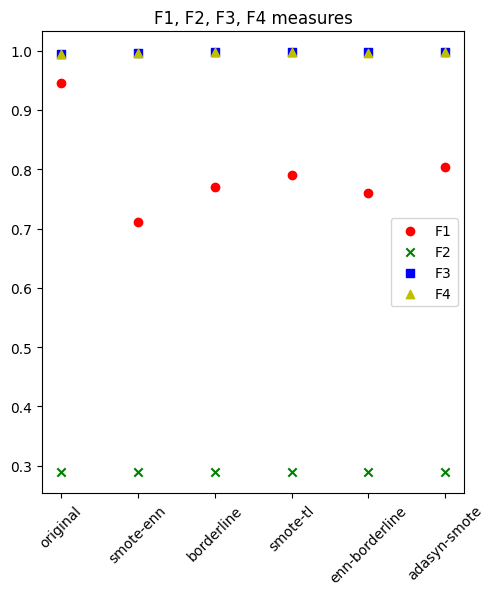

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(fb_measures['dataset'], fb_measures['f1'], color='r', label='F1', marker='o')
plt.scatter(fb_measures['dataset'], fb_measures['f2'], color='g', label='F2', marker='x')
plt.scatter(fb_measures['dataset'], fb_measures['f3'], color='b', label='F3', marker='s')
plt.scatter(fb_measures['dataset'], fb_measures['f4'], color='y', label='F4', marker='^')
plt.xticks(rotation=45)
plt.legend()
plt.title('F1, F2, F3, F4 measures')
plt.show()

Remembering the meaning of each measure:
- **F1**: class separability
- **F2**: feature overlap
- **F3**: best single feature
- **F4**: combined feature effectiveness

In [30]:
df_balanced = pd.concat([X_resampled_adasyn, y_resampled_adasyn], axis=1)

In [31]:
df_balanced.to_csv('../data/balanced.csv', index=False)